In [16]:
#A1
import numpy as np

activation_maps = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_pixel.npy")
labels = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_labelpixel.npy")
activation_maps.shape,labels.shape

((16384, 13), (16384, 1))

In [19]:
zero_rows_mask = (labels==0).any(axis=1)
class1= activation_maps[zero_rows_mask]
class1

array([[0.00784314, 0.00784314, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.00784314, 0.00784314, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.00392157, 0.00784314, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.0745098 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ]])

In [17]:
np.unique(labels)

array([  0,   1, 128, 255], dtype=uint8)

In [20]:
one_rows_mask = (labels == 255).any(axis=1)
class2=activation_maps[one_rows_mask]
class2

array([[0.00392157, 0.01176471, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.01176471, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.01176471, 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0745098 ]])

In [21]:
class1_mean=np.mean(class1,axis=0)
class1_mean

array([8.11570501e-03, 5.52290421e-03, 3.07575680e-03, 1.68480946e-03,
       1.47271767e-03, 7.93853597e-04, 1.38549599e-02, 3.53486312e-04,
       4.42922608e-05, 0.00000000e+00, 5.88576004e-04, 2.34237918e-04,
       7.44621046e-02])

In [22]:
class2_mean=np.mean(class2,axis=0)
class2_mean

array([8.09816004e-03, 5.39862952e-03, 3.15045913e-03, 1.75365921e-03,
       1.53919843e-03, 8.87617371e-04, 1.85497791e-02, 3.93969207e-04,
       6.99047225e-05, 0.00000000e+00, 5.92464098e-04, 2.49844656e-04,
       7.44821872e-02])

In [23]:
class1_std=np.std(class1,axis=0)
class1_std

array([0.01164252, 0.00631803, 0.00514177, 0.0030254 , 0.00216689,
       0.00158841, 0.08188406, 0.00112603, 0.00041441, 0.        ,
       0.00162988, 0.00096809, 0.00042986])

In [24]:
class2_std=np.std(class2,axis=0)
class2_std


array([0.01289548, 0.00675134, 0.00542588, 0.00315884, 0.00218254,
       0.00166051, 0.09514568, 0.00118032, 0.00051889, 0.        ,
       0.00160778, 0.00099929, 0.00032793])

In [25]:
np.linalg.norm(class1_mean-class2_mean)

0.004699315708851367

In [27]:
def minkowskidist(x, y, r):
    d = 0
    for i in range(len(x)):
        d += abs(x[i] - y[i])**r
    return d**(1/r)
distance=[minkowskidist(activation_maps[:][0], activation_maps[:][1], r) for r in range(1,11)]
print(distance)

[0.00392156862745098, 0.00392156862745098, 0.003921568627450981, 0.00392156862745098, 0.0039215686274509795, 0.003921568627450981, 0.003921568627450981, 0.00392156862745098, 0.003921568627450981, 0.0039215686274509795]


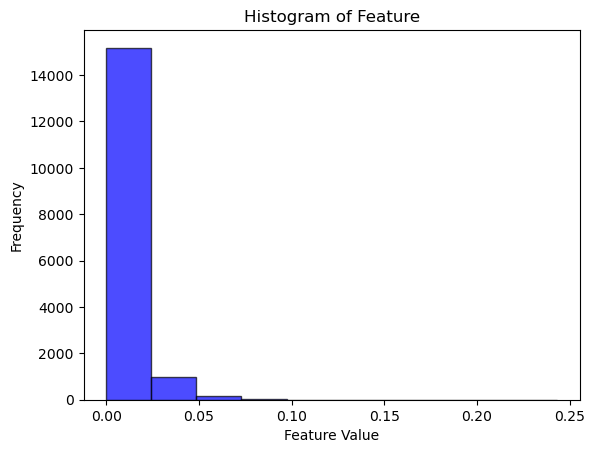

Mean: 0.007903693704044116
Variance: 0.0001458452476968402


In [29]:
import matplotlib.pyplot as plt
feature_to_analyze = activation_maps[:, 0]

# Plot a histogram to observe the density pattern
plt.hist(feature_to_analyze, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

# Calculate the mean and variance of the feature
feature_mean = np.mean(feature_to_analyze)
feature_variance = np.var(feature_to_analyze)

print("Mean:", feature_mean)
print("Variance:", feature_variance)

In [30]:
#A4
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


print(activation_maps.shape,labels.shape)
# Reshape your data into a 2D format (pixels x features)
num_samples = activation_maps.shape[0]   # Total number of pixels
num_features = activation_maps.shape[1]  # Number of features for each pixel

X_reshaped = activation_maps.reshape(num_samples, num_features)
y_reshaped = labels.reshape(num_samples)  # Assuming y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

(16384, 13) (16384, 1)
(16384, 13) (16384,)


In [31]:
#A4
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.15      0.20       936
           1       0.11      0.01      0.01       126
         128       0.13      0.03      0.05       376
         255       0.56      0.83      0.66      1839

    accuracy                           0.51      3277
   macro avg       0.28      0.25      0.23      3277
weighted avg       0.42      0.51      0.44      3277



In [33]:
#A5
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.41959108941104667


In [34]:
#A6
# Assuming you have already trained the k-NN classifier 'neigh' and have X_test and y_test from the previous code
accuracy = neigh.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.41959108941104667


In [35]:
#A7
y_pred = neigh.predict(X_test)
print("Predicted labels for test set:", y_pred)

Predicted labels for test set: [255 255 255 ... 128   1   0]


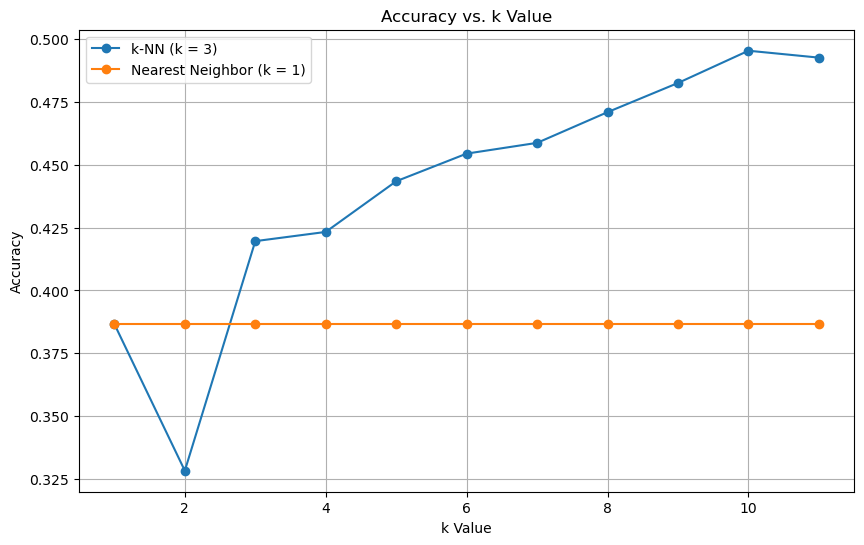

In [36]:
#A8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



# Define a list of values of k to test (from 1 to 11)
k_values = list(range(1, 12))


knn_accuracies = []
nn_accuracies = []

for k in k_values:
    # Train a k-NN classifier with the current k value (k-NN)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_y_pred = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_y_pred)
    knn_accuracies.append(knn_accuracy)

    # Train a nearest neighbor classifier (k = 1)
    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(X_train, y_train)
    nn_y_pred = nn_classifier.predict(X_test)
    nn_accuracy = accuracy_score(y_test, nn_y_pred)
    nn_accuracies.append(nn_accuracy)

# Plot the accuracy results
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', label='k-NN (k = 3)')
plt.plot(k_values, nn_accuracies, marker='o', label='Nearest Neighbor (k = 1)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value')
plt.legend()
plt.grid(True)
plt.show()
